In [1]:
import numpy as np

import json
import pandas as pd

In [2]:
import osmnx as ox
import networkx as nx

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import random

In [5]:
from bike_service import *
from prepare_ecobici_data import *

# Información de las estaciones

Buscando en los archivos que https://www.ecobici.cdmx.gob.mx/es/mapa-de-cicloestaciones necesita, encontramos el archivo getJsonObject.json que contiene la información de todas las estaciones de Ecobici. Lo renombramos ecobici_stations.json, lo leemos y lo modificamos un poco.

In [6]:
preprocess_station_data()

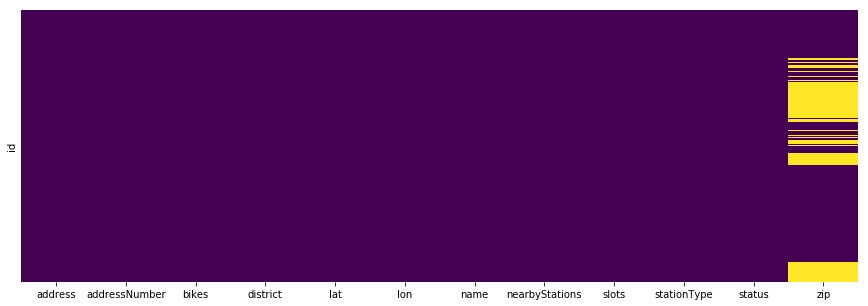

In [7]:
plt.figure(figsize=(15,5))
station_data_completeness()

In [8]:
ecobici_stations = pd.read_csv('data/ecobici_stations.csv', index_col=0)

In [9]:
preprocess_travel_data()

# Mapa de las delegaciones en que existe la red de Ecobici

La red de Ecobici abarca sólo unas cuantas delegaciones de la CDMX: Cuauhtémoc, Benito Juárez y Miguel Hidalgo. Entonces le pedimos a OpenStreetMap a través de osmnx que nos muestre únicamente el mapa de esas delegaciones.

In [10]:
# delegaciones en las que hay cobertura de ECOBICI.
delegaciones = ['Cuauhtemoc, Mexico City, Mexico',
                'Benito Juárez, Mexico City, Mexico',
                'Miguel Hidalgo, Mexico City, Mexico']
#ecobici_zone = ox.graph_from_place(delegaciones)

# Viajes

In [11]:
travels = pd.read_csv('data/2018-08.csv', index_col=0)

Cargamos los nodos más cercanos a cada una de las estaciones como las únicas ubicaciones aproximadas que osmnx le puede asignar a las estaciones.

In [12]:
travels.head()

Genero_Usuario  Edad_Usuario   Bici  Ciclo_Estacion_Retiro Fecha_Retiro  \
0              M            49   9990                    150   01/08/2018   
1              F            25   8901                     64   01/08/2018   
2              M            35   6937                     56   01/08/2018   
3              F            31   7188                     88   01/08/2018   
4              M            36  10306                     75   01/08/2018   

  Hora_Retiro  Ciclo_Estacion_Arribo Fecha_Arribo Hora_Arribo  \
0     0:00:13                    179   01/08/2018     0:23:38   
1     0:00:38                    179   01/08/2018     0:10:42   
2     0:01:48                     75   01/08/2018     0:08:32   
3     0:02:28                     64   01/08/2018     0:30:24   
4     0:03:27                     53   01/08/2018     0:17:26   

     Fecha_Hora_Arribo    Fecha_Hora_Retiro  Tiempo_Transcurrido  
0  2018-08-01 00:23:38  2018-08-01 00:00:13               1405.0  
1  2018-08-01 00:10:42  2018-08-01 00:00:38                604.0  
2  2018-08-01 00:08:32  2018-08-01 00:01:48                404.0  
3  2018-08-01 00:30:24  2018-08-01 00:02:28               1676.0  
4  2018-08-01 00:17:26  2018-08-01 00:03:27                839.0

In [13]:
travels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732815 entries, 0 to 732935
Data columns (total 12 columns):
Genero_Usuario           732815 non-null object
Edad_Usuario             732815 non-null int64
Bici                     732815 non-null int64
Ciclo_Estacion_Retiro    732815 non-null int64
Fecha_Retiro             732815 non-null object
Hora_Retiro              732815 non-null object
Ciclo_Estacion_Arribo    732815 non-null int64
Fecha_Arribo             732815 non-null object
Hora_Arribo              732815 non-null object
Fecha_Hora_Arribo        732815 non-null object
Fecha_Hora_Retiro        732815 non-null object
Tiempo_Transcurrido      732815 non-null float64
dtypes: float64(1), int64(4), object(7)
memory usage: 72.7+ MB


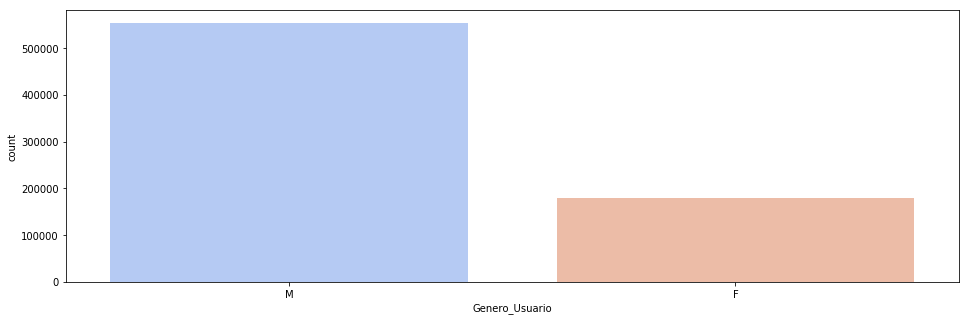

In [14]:
plt.figure(figsize=(16,5))
sns.countplot(travels['Genero_Usuario'], palette='coolwarm')

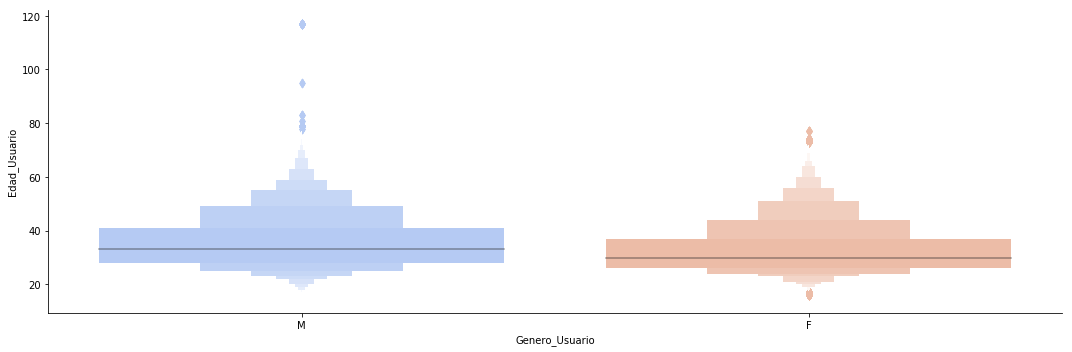

In [15]:
sns.catplot(x = 'Genero_Usuario', y = 'Edad_Usuario', data = travels, 
            height = 5, aspect=3, kind = 'boxen', palette = 'coolwarm')

In [16]:
ecobici_service = BikeService('ecobici', delegaciones, ecobici_stations, travels)

In [17]:
time_window = 24*3600

In [18]:
ecobici_use = ecobici_service.activity_ts('2018-08-01 04:00:00', '2018-08-31 04:00:00', time_window=time_window)

/home/pedro/git_repositories/ecobici_analysis/bike_service.py:212: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  take_df['time_units'] = (take_df['Fecha_Hora_Retiro'] - initial_date).astype('timedelta64[s]') // time_window
/home/pedro/git_repositories/ecobici_analysis/bike_service.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  lock_df['time_units'] = (lock_df['Fecha_Hora_Arribo'] - initial_date).astype('timedelta64[s]') // time_window


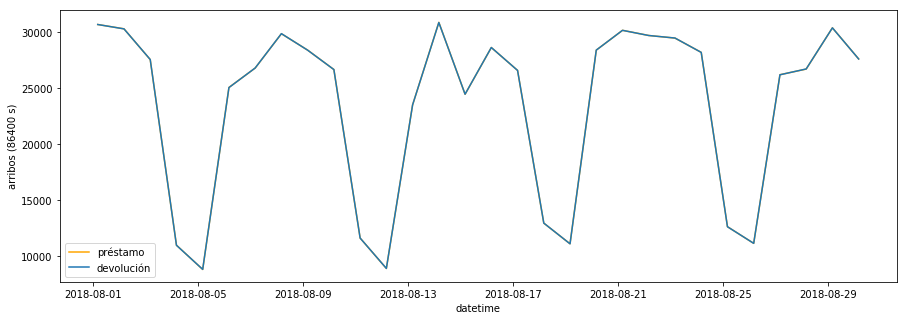

In [19]:
plt.figure(figsize = (15,5))
sns.lineplot(x = ecobici_use['take']['datetime'], 
             y = ecobici_use['take']['retiros (' + str(time_window) + ' s)'], color='orange', label = 'préstamo')
sns.lineplot(x = ecobici_use['lock']['datetime'],
             y = ecobici_use['lock']['arribos (' + str(time_window) + ' s)'], label = 'devolución')
plt.legend()

In [20]:
station_use = ecobici_service.station(50).activity_ts('2018-08-01 04:00:00', '2018-08-31 04:00:00', time_window=time_window)

/home/pedro/git_repositories/ecobici_analysis/bike_service.py:458: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  take_df['time_units'] = (take_df['Fecha_Hora_Retiro'] - initial_date).astype('timedelta64[s]')//time_window
/home/pedro/git_repositories/ecobici_analysis/bike_service.py:459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  lock_df['time_units'] = (lock_df['Fecha_Hora_Arribo'] - initial_date).astype('timedelta64[s]')//time_window


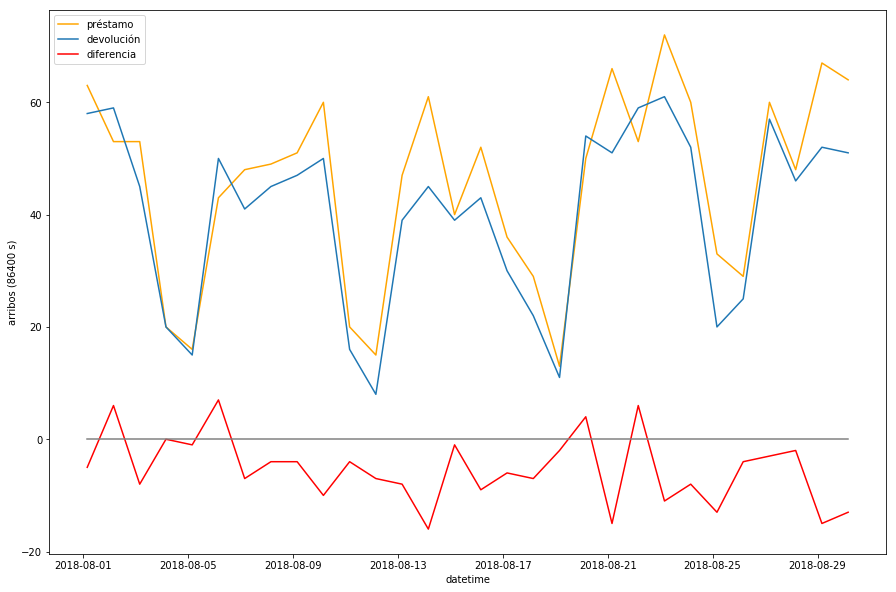

In [28]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x = station_use['take']['datetime'], 
             y = station_use['take']['retiros (' + str(time_window) + ' s)'], color='orange', label = 'préstamo',
            markers = True)
sns.lineplot(x = station_use['lock']['datetime'], 
             y = station_use['lock']['arribos (' + str(time_window) + ' s)'], label = 'devolución')
sns.lineplot(x = station_use['lock']['datetime'], 
             y = station_use['lock']['arribos (' + str(time_window) + ' s)']
             - station_use['take']['retiros (' + str(time_window) + ' s)'], label = 'diferencia', color = 'r')
sns.lineplot(x = station_use['lock']['datetime'], y = 0, markers = 'o', color = 'gray')
plt.legend()

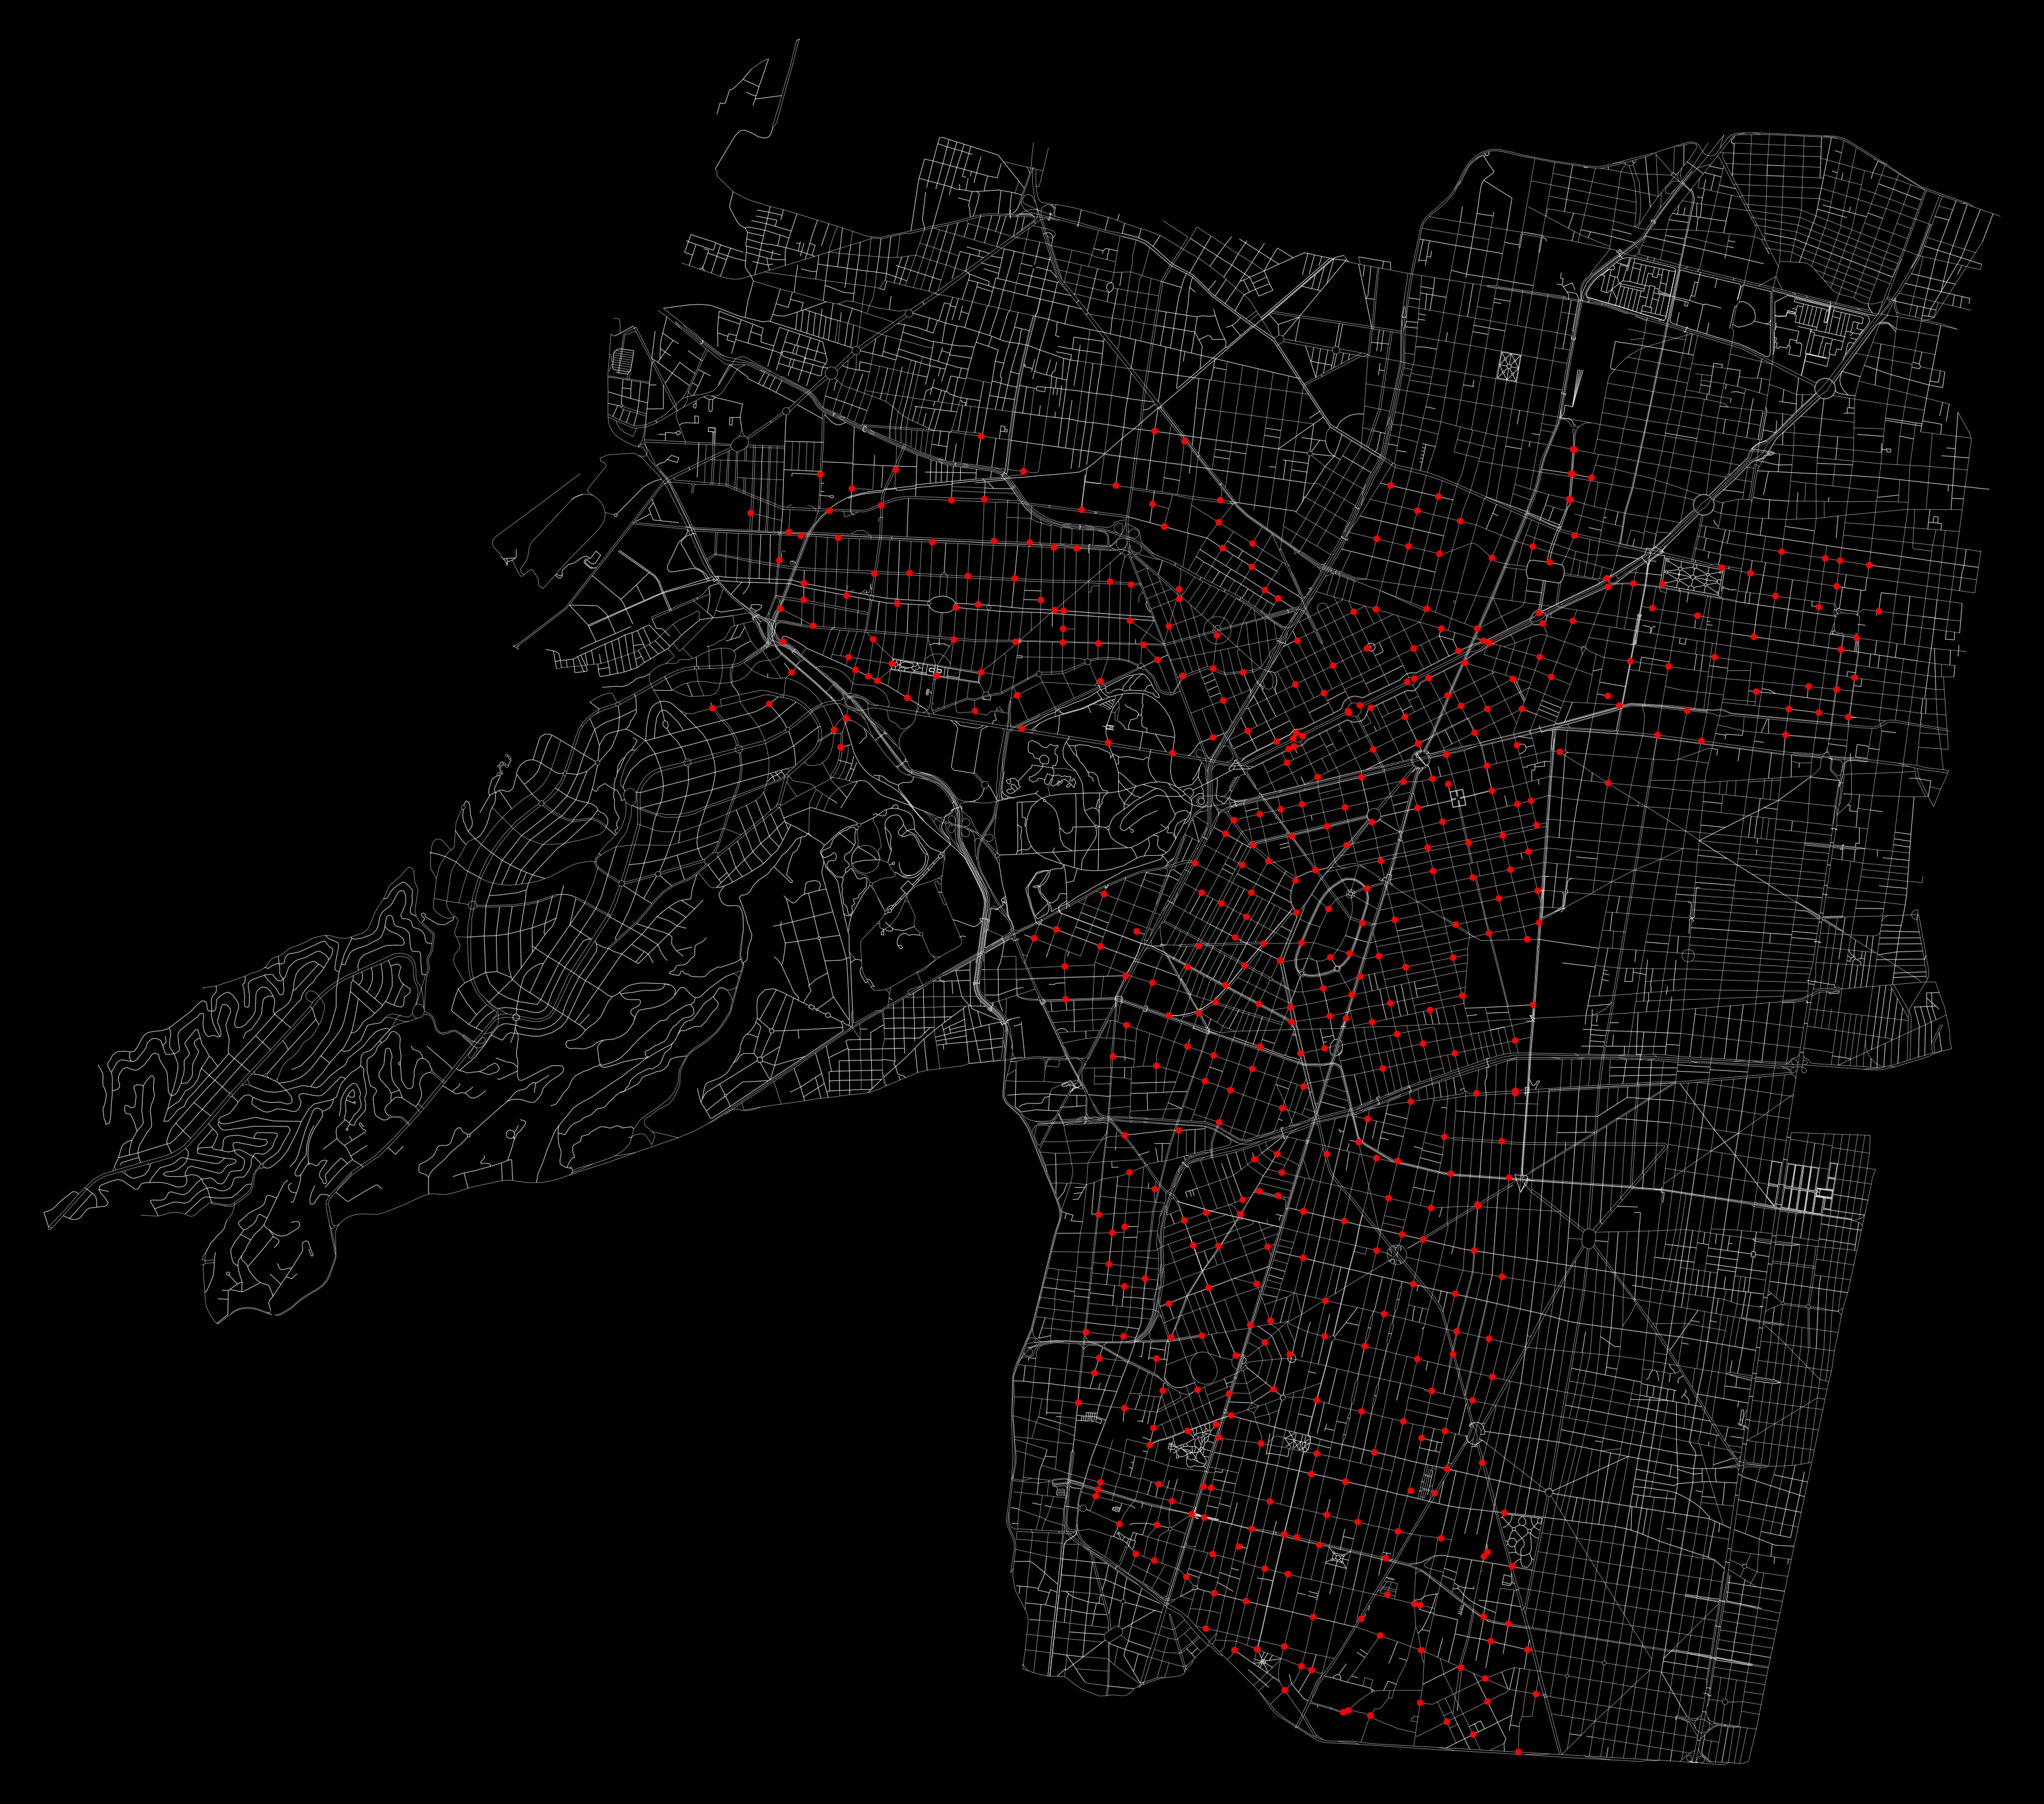

In [29]:
ecobici_service.map()

In [31]:
straight_distances = ecobici_service.stations_distances('straight')
street_distances = ecobici_service.stations_distances('street')

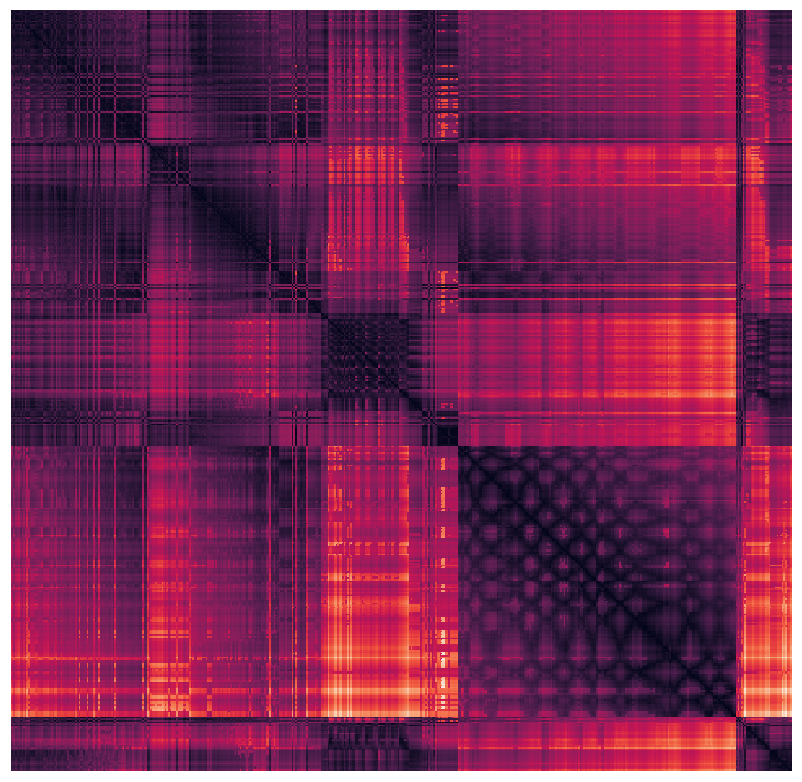

In [38]:
plt.figure(figsize=(14,14))
sns.heatmap(street_distances, xticklabels=False, yticklabels=False, cbar = False)

In [ ]:
straight_distances_indices = [val[0] for val in sorted(enumerate(straight_distances[0,:]), key = lambda x: x[1])]
straight_distances_sorted = [straight_distances[0,:][index] for index in straight_distances_indices]
street_distances_from_sorted = [street_distances[0,:][index] for index in straight_distances_indices]
street_distances_to_sorted = [street_distances[:,0][index] for index in straight_distances_indices]

In [ ]:
plt.figure(figsize = (15,7))

sns.scatterplot(np.arange(1,ecobici_service.size+1), straight_distances_sorted, label = 'por el cielo')
sns.scatterplot(np.arange(1,ecobici_service.size+1), street_distances_from_sorted, label = 'por la tierra de ida')
sns.scatterplot(np.arange(1,ecobici_service.size+1), street_distances_to_sorted, label = 'por la tierra de vuelta')
plt.legend()

In [ ]:
ecobici_service.station(1).connections_subgraph()

El tiempo máximo de uso es 45 minutos (2700 segundos)

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(17, 6))
sns.distplot(travels['Tiempo_Transcurrido'], kde=False, rug=False, ax=ax[0],
             hist_kws={"range": [0,2700]}, label = 'Hasta 45 minutos')
plt.legend()
sns.distplot(travels['Tiempo_Transcurrido'], kde=False, rug=False, ax=ax[1],
             hist_kws={"range": [2700,travels['Tiempo_Transcurrido'].max()]}, label = 'Tiempo excedido')
ax[0].legend()
ax[1].legend()

In [ ]:
ecobici_service.voronoi_plot(save=True, seed=101)

In [ ]:
guate_graph = ox.graph_from_address(['Ciudad de Guatemala, Guatemala'], distance = 10000)

In [ ]:
ox.plot_graph(guate_graph, fig_height=50, node_color='white', bgcolor='black', edge_color='white', 
              dpi = 100, filename='guate', save=True)

In [51]:
sizes_take = [ecobici_service.station(id).activity_ts('2018-08-01 04:00:00', 
                                                      '2018-08-02 04:00:00', 
                                                      time_window=time_window)['take']['retiros (' + str(time_window) + ' s)'] for id in range(1,481)]

In [72]:
activity_df = pd.read_csv('data/2018-08.csv', index_col=0)

In [99]:
activity_df_take = activity_df[activity_df['Fecha_Retiro']=='01/08/2018'].groupby('Ciclo_Estacion_Retiro').count()
activity_df_lock = activity_df[activity_df['Fecha_Arribo']=='01/08/2018'].groupby('Ciclo_Estacion_Arribo').count()

In [100]:
activity_df_take

Genero_Usuario  Edad_Usuario  Bici  Fecha_Retiro  \
Ciclo_Estacion_Retiro                                                     
1                                 292           292   292           292   
2                                 102           102   102           102   
3                                 118           118   118           118   
4                                  91            91    91            91   
5                                  93            93    93            93   
6                                 116           116   116           116   
7                                 134           134   134           134   
8                                  69            69    69            69   
9                                 104           104   104           104   
10                                128           128   128           128   
11                                135           135   135           135   
12                                 59            59    59            59   
13                                 98            98    98            98   
14                                263           263   263           263   
15                                168           168   168           168   
16                                162           162   162           162   
17                                151           151   151           151   
18                                216           216   216           216   
19                                131           131   131           131   
20                                159           159   159           159   
21                                149           149   149           149   
22                                158           158   158           158   
23                                214           214   214           214   
24                                194           194   194           194   
25                                159           159   159           159   
26                                113           113   113           113   
27                                318           318   318           318   
28                                123           123   123           123   
29                                 82            82    82            82   
30                                 68            68    68            68   
...                               ...           ...   ...           ...   
451                                46            46    46            46   
452                                94            94    94            94   
453                                19            19    19            19   
454                                17            17    17            17   
455                                27            27    27            27   
456                                14            14    14            14   
457                                11            11    11            11   
458                                31            31    31            31   
459                                21            21    21            21   
460                                35            35    35            35   
461                                53            53    53            53   
462                                35            35    35            35   
463                                53            53    53            53   
464                                17            17    17            17   
465                                25            25    25            25   
466                                24            24    24            24   
467                                14            14    14            14   
468                                19            19    19            19   
469                                 7             7     7             7   
470                                52            52    52            52   
471                                44           

In [104]:
sizes_take = []
for i in range(1,481):
    if i in activity_df_take.index:
        sizes_take.append(activity_df_take.at[i,'Genero_Usuario'])
    else:
        sizes_take.append(0)

In [106]:
len(sizes_take)

480

Genero_Usuario  Edad_Usuario   Bici  Ciclo_Estacion_Retiro  \
0                   M            49   9990                    150   
1                   F            25   8901                     64   
2                   M            35   6937                     56   
3                   F            31   7188                     88   
4                   M            36  10306                     75   
5                   M            29   2804                     47   
6                   M            23  10066                    354   
7                   M            42   7319                     52   
8                   M            32   1468                     14   
9                   M            35   7676                     44   
10                  M            25  10806                     54   
11                  M            31   7704                    284   
12                  M            35   9019                     47   
13                  M            41  11394                     46   
14                  M            27  10624                     26   
15                  M            30  10529                    147   
16                  M            42  15334                    391   
17                  M            25   7441                    121   
18                  M            44   7360                      9   
19                  M            28   7343                     49   
20                  M            60  10044                    230   
21                  F            25   3412                    289   
22                  F            32  10921                    128   
23                  M            24  10435                    277   
24                  M            44   4227                      7   
25                  F            41   6774                    281   
26                  M            43   7249                     83   
27                  M            33   8947                    326   
28                  M            27  10847                     16   
29                  M            32   4070                    135   
...               ...           ...    ...                    ...   
732906              M            60  10869                     43   
732907              M            33   4039                     55   
732908              F            25  11439                    227   
732909              M            30   1911                    121   
732910              M            34   9615                    119   
732911              F            28  11172                    129   
732912              M            41  11019                    129   
732913              M            27   7216                    125   
732914              M            55   9119                     27   
732915              M            25  10141                    447   
732916              M            25   8213                    270   
732917              M            30  10295                    150   
732918              M            28   4157                     24   
732919              F            27  10741                    186   
732920              M            32  10207                    116   
732921              M            32   7304                     31   
732922              M            32   7648                    295   
732923              M            27   8549                    117   
732924              F            21   8164                     76   
732925              M            41   8773                    435   
732926              M            27   3903                     54   
732927              F            43  11715                    163   
732928              F            24   9207                     40   
732929              M            30   7856                     35   
732930              M            31  11720                    128   
732931              M            23   3934                     74   
73293